In [154]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from sklearn.preprocessing import minmax_scale

In [155]:
# range de possiveis valores de K
K = range(1, 10)

In [156]:
def pca_plot(clusters, centers, target_names, filename=None):
    '''
    Metodo para a plotagem do resultado da clusterizacao
    clusters: dataset dimensionalizado para 2 dimensoes
    centers: centros dos clusters
    target_names: 
    filename: (Opcional) nome do arquivo para persistencia da plotagem
    '''

    plt.rcParams["figure.figsize"] = (20,10)
    colors = ['red', 'blue', 'green', 'yellow', 'orange', 'pink', 'gold', 'lime', 'aqua', 'crimson', 'gray', 'cyan', 'firebrick', 'peru', 'blueviolet', 'springgreen', 'teal', 'olive', 'navy', 'fuchsia']

    # plotagem dos pontos de cada cluster
    for i in range(len(clusters)):
        item = clusters[i]
        color = colors[target_names[i]]
        plt.scatter(item[0], item[1], color=color)

    # plotagem dos centros
    for i in range(len(centers)):
        center = centers[i]
        plt.scatter(center[0], center[1], color='black', marker="x")

    if filename != None:
        plt.savefig(filename, bbox_inches='tight')
    else:
        plt.show()

In [157]:
def kmeans_func(num_clusters, dataset):
    #km = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=5, max_iter=150, random_state=42)
    '''
    n_clusters: The number of clusters to form as well as the number of centroids to generate.
    init: Method for initialization
    n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
    max_iter: Maximum number of iterations of the k-means algorithm for a single run.
    '''
    km.fit(dataset)
    return km

In [158]:
def elbow(dataset):
    print("Elbow Method")
    scores = list()

    # iteracao para selecao do K
    for i in K:
        #print(i)
        km = kmeans_func(i, dataset)
        scores.append(km.inertia_)
        '''
        KMeans.inertia_: Sum of squared distances of samples to their closest cluster center.
        Criterio utilizado pelo algoritmo para determinar a coerencia interna dos clusters
        '''
    plt.rcParams["figure.figsize"] = (20,10)
    plt.plot(K, scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Cost')
    plt.title('Selecting k with the Elbow Method')
    plt.show()
    #plt.savefig('elbow.png', bbox_inches='tight')

In [159]:
def internal_eval(dataset, docs_id):
    print("Clusters Evaluation")
    # aplicacao do PCA para plotagem dos dados (reducao para 2 dimensoes)
    pca = PCA(n_components=2)
    dataset_2d = pca.fit_transform(dataset)

    silhouette_max_score = 0
    silhouette_best_model = None
    silhouette_better_num_cluster = 0
    ch_max_score = 0
    ch_best_model = None
    ch_better_num_cluster = 0
    for i in K:
        if i < 2:
            continue
        km = kmeans_func(i, dataset)

        s_score = silhouette_score(dataset, km.labels_, metric='euclidean')
        ch_score = calinski_harabaz_score(dataset, km.labels_)
        print("Score for %d clusters: %f\t%f" % (i, s_score, ch_score))

        centers = pca.fit_transform(km.cluster_centers_)
        pca_plot(dataset_2d, centers, km.labels_, "%d_clusters.png"%(i))

        if s_score > silhouette_max_score:
            silhouette_max_score = s_score
            silhouette_best_model = km
            silhouette_better_num_cluster = i

        if ch_score > ch_max_score:
            ch_max_score = ch_score
            ch_best_model = km
            ch_better_num_cluster = i

    print()
    print("Silhouette Coefficient")
    print("Best num clusters %d"%(silhouette_better_num_cluster))
    pca_plot(dataset_2d, silhouette_best_model.cluster_centers_, silhouette_best_model.labels_)
    '''
    for i in range(len(dataset)):
        print(docs_id[i].strip())
        print(silhouette_best_model.labels_[i])
    '''

    print()
    print("Calinski-Harabaz Index")
    print("Best num clusters %d"%(ch_better_num_cluster))
    pca_plot(dataset_2d, ch_best_model.cluster_centers_, ch_best_model.labels_)
    '''
    for i in range(len(dataset)):
        print(docs_id[i].strip())
        print(ch_best_model.labels_[i])
    '''

# Main Routine

In [160]:
print("Loading dataset")
bow_file = 'documents/data.csv'
#bow_file = 'documents/data-mini.csv'
dataset = np.loadtxt(bow_file, delimiter=',')
print("Preprocessing")
dataset = minmax_scale(dataset)

docs_id_file = 'documents/ids'
with open(docs_id_file) as f:
    docs_id = f.readlines()

Loading dataset
Preprocessing


## Elbow Method

Elbow Method


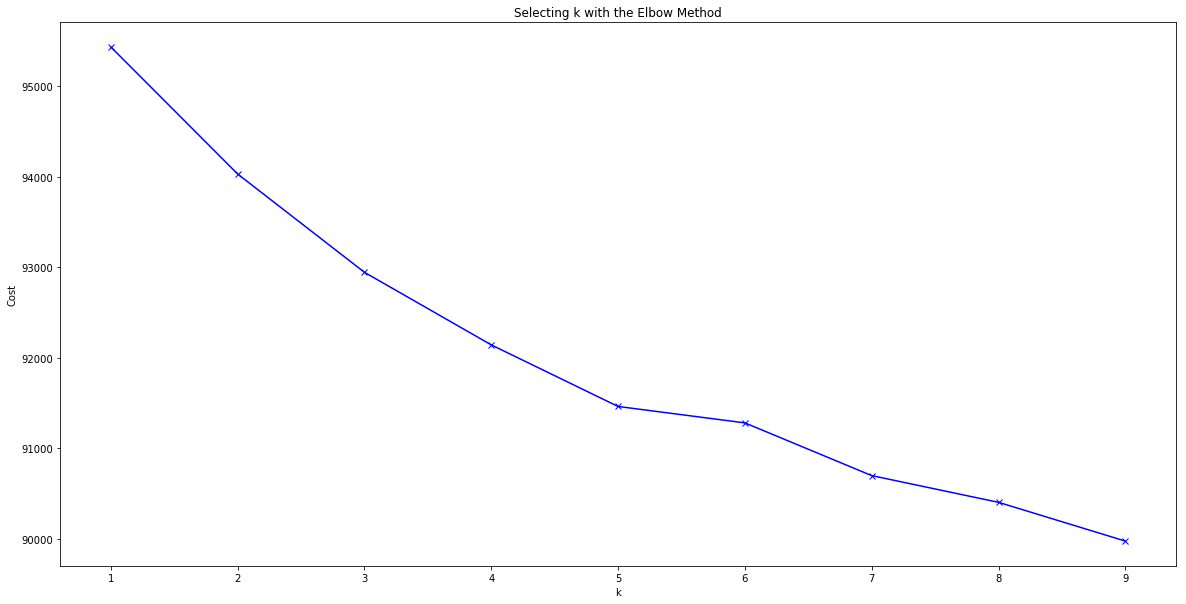

In [161]:
#K = range(1, 50)
elbow(dataset)

## Internal Evaluation

Clusters Evaluation
Score for 2 clusters: 0.015802	297.321599
Score for 3 clusters: 0.019923	266.726403
Score for 4 clusters: 0.009765	237.114865
Score for 5 clusters: 0.011328	216.174267
Score for 6 clusters: 0.001699	181.190712
Score for 7 clusters: 0.009213	173.258694
Score for 8 clusters: 0.004733	158.271974
Score for 9 clusters: 0.006433	150.983298

Silhouette Coefficient
Best num clusters 3


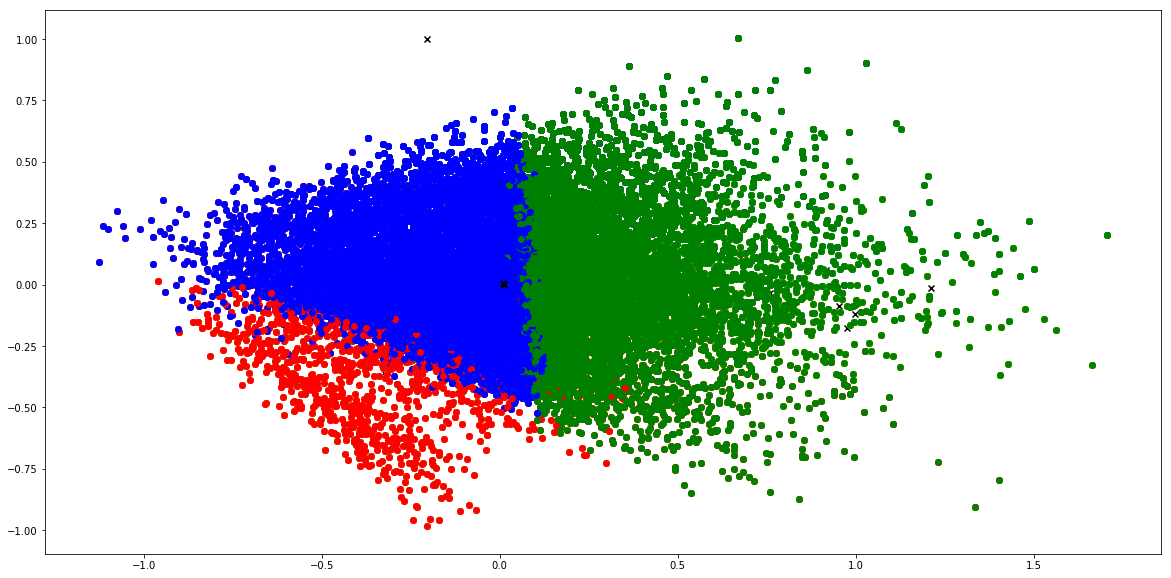


Calinski-Harabaz Index
Best num clusters 2


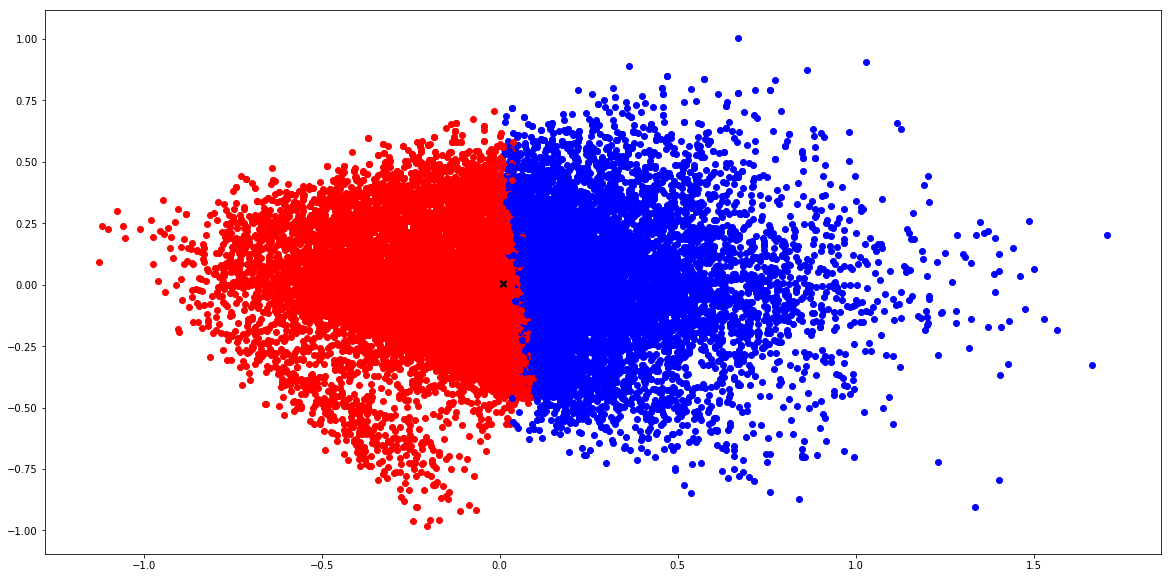

In [162]:
#K = range(1, 20)
internal_eval(dataset, docs_id)

## Empiric Selection

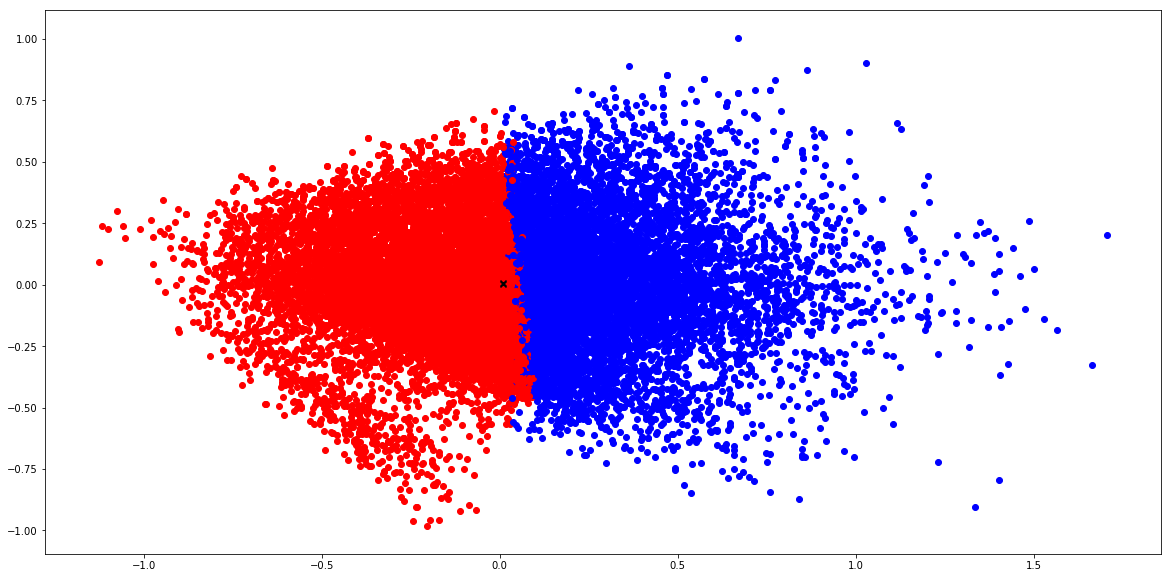

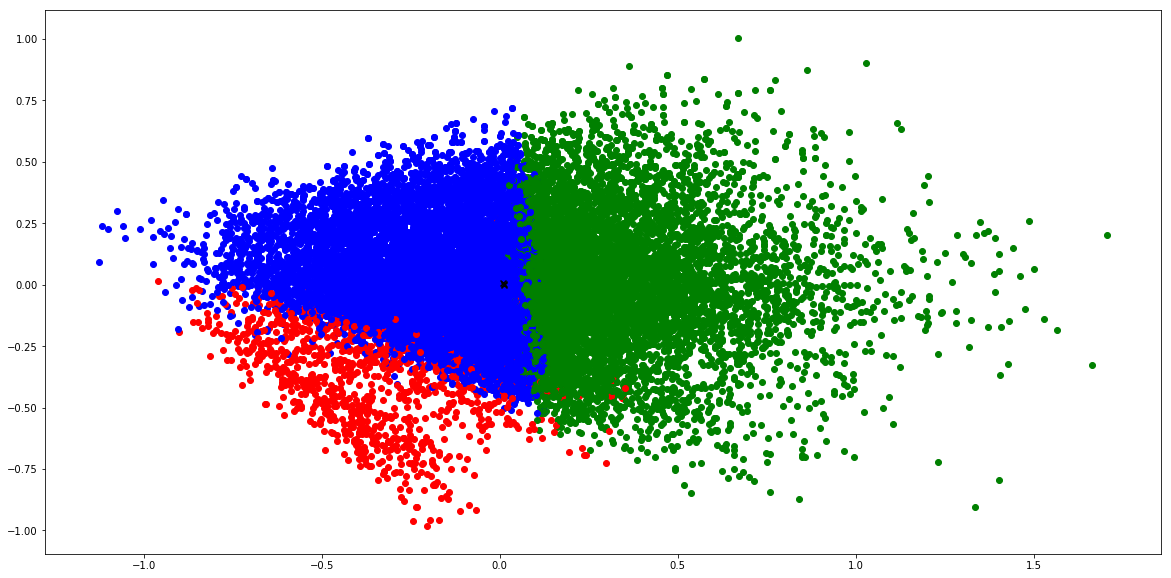

In [163]:
pca = PCA(n_components=2)
dataset_2d = pca.fit_transform(dataset)

km2 = kmeans_func(2, dataset)
pca_plot(dataset_2d, km2.cluster_centers_, km2.labels_)

km3 = kmeans_func(3, dataset)
pca_plot(dataset_2d, km3.cluster_centers_, km3.labels_)

km4 = kmeans_func(4, pca_dataset)
pca_plot(dataset_2d, km4.cluster_centers_, km4.labels_)

km5 = kmeans_func(5, dataset)
pca_plot(dataset_2d, km5.cluster_centers_, km5.labels_)

km6 = kmeans_func(6, dataset)
pca_plot(dataset_2d, km6.cluster_centers_, km6.labels_)

## Dimensionality Reduction

In [164]:
pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(dataset)
pca_dataset = pca.transform(dataset)

Elbow Method


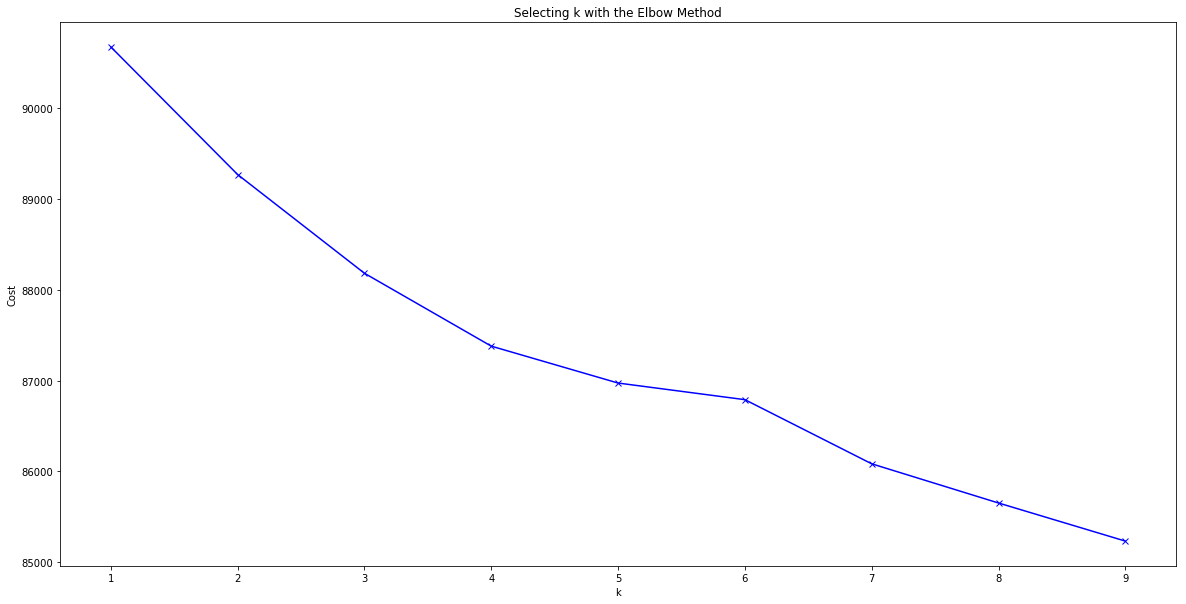

In [165]:
elbow(pca_dataset)

In [ ]:
internal_eval(pca_dataset, docs_id)

In [ ]:
pca = PCA(n_components=2)
dataset_2d = pca.fit_transform(pca_dataset)

km3 = kmeans_func(3, dataset)
pca_plot(dataset_2d, km3.cluster_centers_, km3.labels_)

km4 = kmeans_func(4, pca_dataset)
pca_plot(dataset_2d, km4.cluster_centers_, km4.labels_)

km5 = kmeans_func(5, dataset)
pca_plot(dataset_2d, km5.cluster_centers_, km5.labels_)

km6 = kmeans_func(6, dataset)
pca_plot(dataset_2d, km6.cluster_centers_, km6.labels_)